# Time Frequency Representation
Used for computing the averaged power spectral density and the intertrial coherence

In [1]:
import numpy as np
from mne.time_frequency import tfr_multitaper, tfr_morlet, psd_welch
import os
import mne
import matplotlib.pyplot as plt

In [2]:
conditions = []
# load up epochs file and get dirs

root = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\processed_eeg\\epochs\\'
conditions = os.listdir(root)
print("conditions are ", conditions)

conditions are  ['imagine_audio', 'imagine_orthographic', 'imagine_pictorial', 'perception_audio', 'perception_orthographic', 'perception_pictorial']


## Compute Averaged PSD for each condition

#### Averaged PSD for the 124 channels across participants

['10_1_epo.fif', '11_1_epo.fif', '12_1_epo.fif', '12_2_epo.fif', '13_1_epo.fif', '14_1_epo.fif', '14_2_epo.fif', '15_1_epo.fif', '15_2_epo.fif', '16_1_epo.fif', '17_1_epo.fif', '18_1_epo.fif', '19_1_epo.fif', '3_3_epo.fif', '8_3_epo.fif']
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\10_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\11_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroim

C:\Users\hlw69\AppData\Local\Temp\ipykernel_15848\2748109543.py:14: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  allsub_epoch = mne.concatenate_epochs(epochs)


Not setting metadata
1775 matching events found
No baseline correction applied
    Using multitaper spectrum estimation with 7 DPSS windows


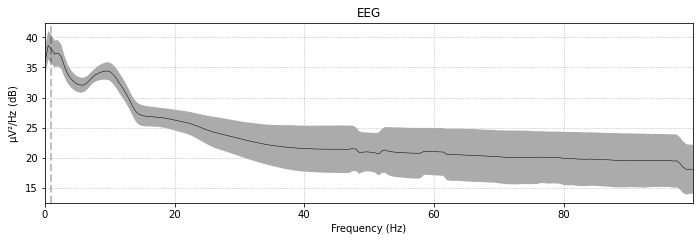

In [4]:
#Note that the maximum value of the x-axis is always half the sampling frequency, which is exactly the Nyquist frequency. This is where the notion of frequency coverage comes into play: if our signal was sampled at 200 Hz instead of 100 Hz, the maximum value on the x-axis would be 200 / 2 = 100 Hz instead of 50 Hz. In other words, increasing the sampling frequency results in a larger frequency range.


for con in conditions:
    if con == 'perception_audio':
        epochs = []
        path = root + con
        epochfiles = os.listdir(path)
        print(epochfiles)
        for files in epochfiles:
                # load epoch file
                # add epochfiles to list
                epochs.append(mne.read_epochs(path + '\\'+files))
        allsub_epoch = mne.concatenate_epochs(epochs)


        # compute power spectral density using Welch's method
       # psd_welch_mean, freqs_mean = psd_welch(fmin = 0,fmax=100, average = 'mean') # psd = (n_epochs, n_channels, n_freqs)



        filtered_psd = allsub_epoch.plot_psd(average = True, estimate = "power", dB=True,fmin = 0,fmax=100, spatial_colors =True) # y is decibals and x is frequency
        filtered_psd.savefig(con+'_filtered_psd.png')


## Plot PSDs for each subject separately 


for con in conditions:
    epochs = []
    path = root + con
    epochfiles = os.listdir(path)
    print(epochfiles)
    for files in epochfiles:
        print("Running for : ", files)
        epochs = mne.read_epochs(path + '\\'+files)
        filtered_psd = epochs.plot_psd(average = True, estimate = "power", dB=True,fmin = 0,fmax=200)
            # load epoch file
            # add epochfiles to list
   # allsub_epoch = mne.concatenate_epochs(epochs)
    
    
    # compute power spectral density using Welch's method
   # psd_welch_mean, freqs_mean = psd_welch(fmin = 0,fmax=100, average = 'mean') # psd = (n_epochs, n_channels, n_freqs)
    
    
        
   # filtered_psd = allsub_epoch.plot_psd(average = True, estimate = "power", dB=True,fmin = 0,fmax=200) # y is decibals and x is frequency
    #filtered_psd.savefig(con+'_filtered_psd.png')
            

### Calculate the Intertrial Coherence
Phase coherence is a measure of temporal snchronticity between a set of oscillations, or the consistency of oscillatory phase across trials. ITC is a measure of investigating phase synchronisity between trials. It is a circular sum of phases at a certain point in time. 1 = perfectly aligned signals. 0 = no intertrial coherence. This is calculated for all the trials together. Should analyse for at which time points strongest coherence was found? And for which conditions? Does it make sense to do ths for all subjects combined - feels like it should be separate?

Can choose between multitaper, morlet wavelets and hanning windows for ITC calculation. Calculating TRF is done using a sliding window, the time window can either be fixed length or it can decreased with increased frequency. Power is calculated for each time window. Wavelets have a good time-frequency resolution trade-off. Multitapers will have smaller error bars than wavelets. Multitapers provides better frequency localisation than wavelets (van Vugt, Sederberg & Kahana, 2007)

['10_1_epo.fif', '11_1_epo.fif', '12_1_epo.fif', '12_2_epo.fif', '13_1_epo.fif', '14_1_epo.fif', '14_2_epo.fif', '15_1_epo.fif', '15_2_epo.fif', '16_1_epo.fif', '17_1_epo.fif', '18_1_epo.fif', '19_1_epo.fif', '3_3_epo.fif', '8_3_epo.fif']
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\10_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\11_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroim

C:\Users\hlw69\AppData\Local\Temp\ipykernel_15848\427577183.py:13: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  allsub_epoch = mne.concatenate_epochs(epochs)


Not setting metadata
1775 matching events found
No baseline correction applied
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.10988726   1.12972989   1.14992727   1.17048573   1.19141174
   1.21271187   1.2343928    1.25646135   1.27892444   1.30178912
   1.32506259   1.34875213   1.3728652    1.39740936   1.42239233
   1.44782194   1.47370619   1.50005319   1.52687123   1.55416872
   1.58195424   1.61023651   1.63902441   1.

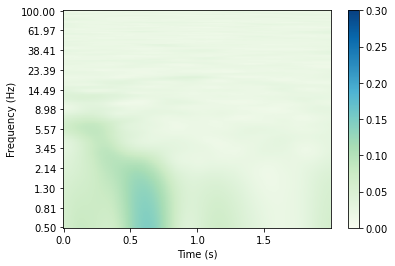

In [5]:
for con in conditions:
    if con == 'perception_audio':
        epochs = []
        path = root + con
        epochfiles = os.listdir(path)
        print(epochfiles)
        count = 0
        for files in epochfiles:
                # load epoch file
                # add epochfiles to list
            epochs.append(mne.read_epochs(path + '\\'+files))
            count+=1
        allsub_epoch = mne.concatenate_epochs(epochs)


        # compute power spectral density using Welch's method
       # psd_welch_mean, freqs_mean = psd_welch(fmin = 0,fmax=100, average = 'mean') # psd = (n_epochs, n_channels, n_freqs)

        freqs = np.logspace(*np.log10([0.5, 100]), num=300) # number refers to the amount of steps
        n_cycles = freqs
        print("freq and n_cycles ", freqs, n_cycles)
       # plt.figure(2, figsize=(14,4))
        power, itc = tfr_morlet(allsub_epoch, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)
        print("itc  ", itc)
      #  plt.subplot(121)
      #  itc.plot(times=times)
      #  plt.axvline(0, linestyle='--', color='black',lw=2)
      #  plt.subplot(122)
        itc_plt = itc.plot(combine = 'mean', dB=False, vmin=0,vmax=0.3, fmin=0.5, fmax=100, cmap='GnBu')
      #  plt.axvline(0, linestyle='--', color='white',lw=2)
      #  itc.show()
        #itc_plt.savefig(con+ '_ITC_allsubs.png')

## Calculate Intersubject coherence for each subject individually

['10_1_epo.fif', '11_1_epo.fif', '12_1_epo.fif', '12_2_epo.fif', '13_1_epo.fif', '14_1_epo.fif', '14_2_epo.fif', '15_1_epo.fif', '15_2_epo.fif', '16_1_epo.fif', '17_1_epo.fif', '18_1_epo.fif', '19_1_epo.fif', '3_3_epo.fif', '8_3_epo.fif']
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\10_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 121, channels : 124, ~194.0 MB>
No baseline correction applied


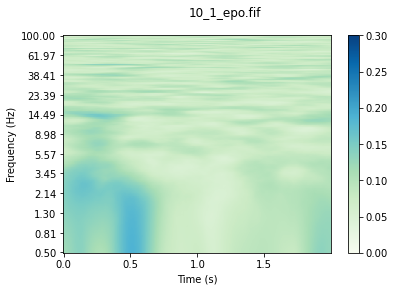

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\11_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.1098872

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 79, channels : 124, ~194.0 MB>
No baseline correction applied


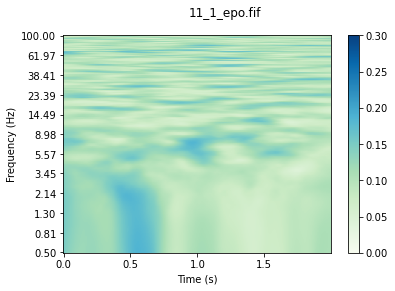

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\12_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
118 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 118, channels : 124, ~194.0 MB>
No baseline correction applied


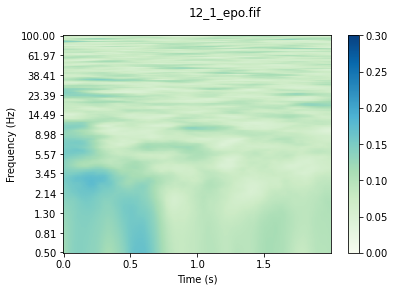

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\12_2_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 116, channels : 124, ~194.0 MB>
No baseline correction applied


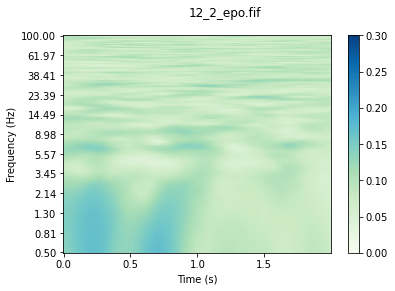

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\13_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 145, channels : 124, ~194.0 MB>
No baseline correction applied


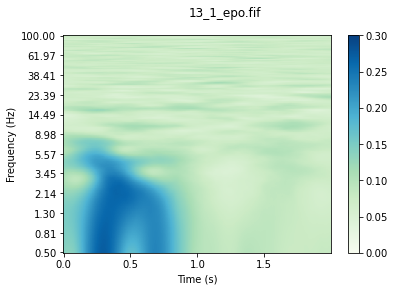

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\14_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 140, channels : 124, ~194.0 MB>
No baseline correction applied


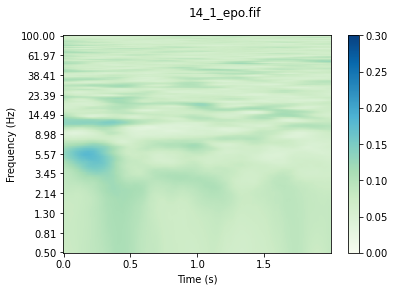

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\14_2_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
147 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 147, channels : 124, ~194.0 MB>
No baseline correction applied


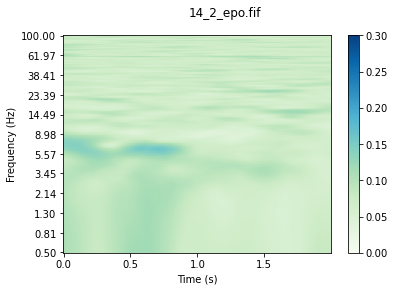

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\15_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.1098872

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 87, channels : 124, ~194.0 MB>
No baseline correction applied


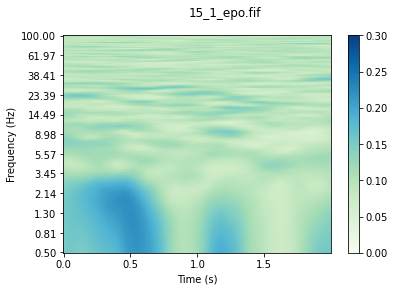

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\15_2_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
141 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 141, channels : 124, ~194.0 MB>
No baseline correction applied


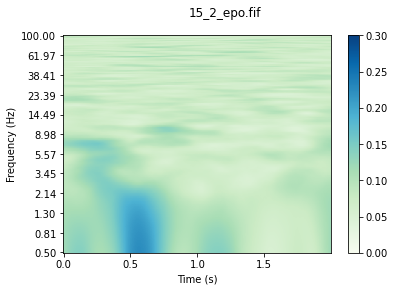

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\16_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
129 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 129, channels : 124, ~194.0 MB>
No baseline correction applied


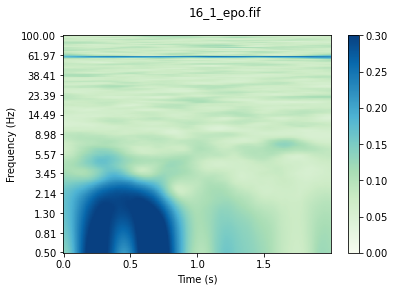

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\17_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 149, channels : 124, ~194.0 MB>
No baseline correction applied


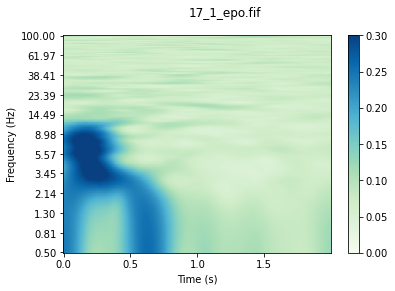

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\18_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.1098872

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 74, channels : 124, ~194.0 MB>
No baseline correction applied


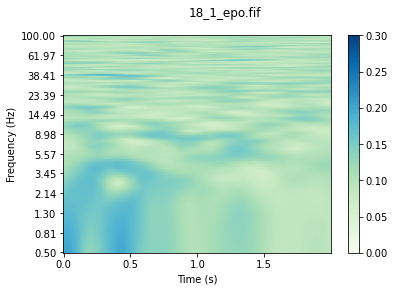

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\19_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.109887

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 100, channels : 124, ~194.0 MB>
No baseline correction applied


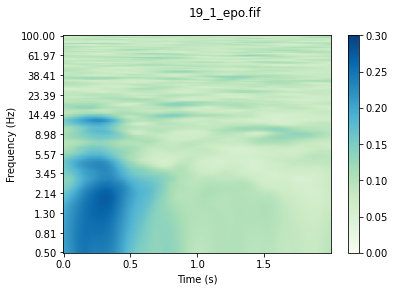

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\3_3_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.10988726

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 81, channels : 124, ~194.0 MB>
No baseline correction applied


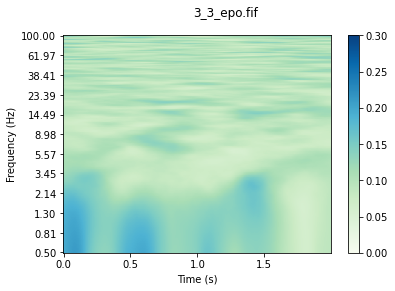

Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\8_3_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
freq and n_cycles  [  0.5          0.50893903   0.51803787   0.52729938   0.53672647
   0.5463221    0.55608928   0.56603107   0.57615061   0.58645106
   0.59693567   0.60760772   0.61847056   0.62952762   0.64078235
   0.65223829   0.66389905   0.67576827   0.6878497    0.70014711
   0.71266438   0.72540544   0.73837428   0.75157498   0.76501168
   0.7786886    0.79261004   0.80678037   0.82120403   0.83588557
   0.85082958   0.86604076   0.88152389   0.89728382   0.91332551
   0.929654     0.94627441   0.96319196   0.98041196   0.99793982
   1.01578104   1.03394124   1.0524261    1.07124143   1.09039315
   1.1098872

itc   <AverageTFR | time : [0.000000, 1.998047], freq : [0.500000, 100.000000], nave : 148, channels : 124, ~194.0 MB>
No baseline correction applied


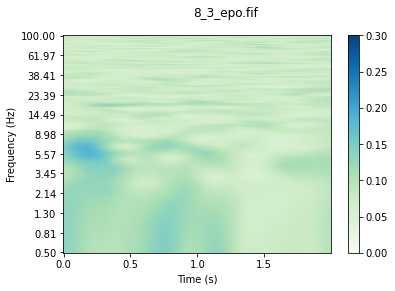

In [4]:
con = 'perception_audio'
for con in conditions:
    if con == 'perception_audio':
        epochs = []
        path = root + con
        epochfiles = os.listdir(path)
        print(epochfiles)
        count = 0
        for files in epochfiles:
            epochs = mne.read_epochs(path + '\\'+files)
                # load epoch file
                # add epochfiles to list

        # compute power spectral density using Welch's method
       # psd_welch_mean, freqs_mean = psd_welch(fmin = 0,fmax=100, average = 'mean') # psd = (n_epochs, n_channels, n_freqs)
            freqs = np.logspace(*np.log10([0.5, 100]), num=300) # number refers to the amount of steps
            n_cycles = freqs
            print("freq and n_cycles ", freqs, n_cycles)
           # plt.figure(2, figsize=(14,4))
            power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)
            print("itc  ", itc)
          #  plt.subplot(121)
          #  itc.plot(times=times)
          #  plt.axvline(0, linestyle='--', color='black',lw=2)
          #  plt.subplot(122)
            itc_plt = itc.plot(title=files, combine = 'mean', dB=False, vmin=0,vmax=0.3, fmin=0.5, fmax=100, cmap='GnBu')